In [4]:
import pandas as pd
data = pd.read_csv('/content/all_songs_data.csv')
print(data.head())


                                 Album  \
0                Battle of New Orleans   
1                           That’s All   
2       “Mr Personality’s” 15 Big Hits   
3  The Greatest Hits Of Frankie Avalon   
4           Paul Anka Sings His Big 15   

                                           Album URL          Artist  \
0  https://genius.com/albums/Johnny-horton/Battle...   Johnny Horton   
1   https://genius.com/albums/Bobby-darin/That-s-all     Bobby Darin   
2  https://genius.com/albums/Lloyd-price/Mr-perso...     Lloyd Price   
3  https://genius.com/albums/Frankie-avalon/The-g...  Frankie Avalon   
4  https://genius.com/albums/Paul-anka/Paul-anka-...       Paul Anka   

  Featured Artists                                             Lyrics  \
0               []  [Verse 1] In 1814 we took a little trip Along ...   
1               []  Oh the shark, babe Has such teeth, dear And he...   
2               []  Over and over I tried to prove my love to you ...   
3               []  He

In [5]:
# Descriptive statistics for numerical columns
print(data.describe())

# Descriptive statistics for categorical columns
print(data.describe(include='object'))


              Rank         Year
count  6500.000000  6500.000000
mean     50.500000  1991.000000
std      28.868291    18.763106
min       1.000000  1959.000000
25%      25.750000  1975.000000
50%      50.500000  1991.000000
75%      75.250000  2007.000000
max     100.000000  2023.000000
                Album                                          Album URL  \
count            6036                                               6036   
unique           4202                                               4285   
top     Greatest Hits  https://genius.com/albums/Morgan-wallen/One-th...   
freq               21                                                  9   

         Artist Featured Artists          Lyrics Media Release Date  \
count      6500             6384            6384  6384         4563   
unique     3181              612            6044  5054         3233   
top     Madonna               []  [Instrumental]    []   2022-05-06   
freq         35             5492              2

In [6]:
rank_stats = data['Rank'].describe()
rank_frequency = data['Rank'].value_counts().sort_index()
top_artists = data['Artist'].value_counts().head(10)

print("Descriptive Statistics for Song Ranks:")
print(rank_stats)
print("\nFrequency of Songs by Rank:")
print(rank_frequency)
print("\nTop 10 Artists by Number of Songs:")
print(top_artists)


Descriptive Statistics for Song Ranks:
count    6500.000000
mean       50.500000
std        28.868291
min         1.000000
25%        25.750000
50%        50.500000
75%        75.250000
max       100.000000
Name: Rank, dtype: float64

Frequency of Songs by Rank:
Rank
1      65
2      65
3      65
4      65
5      65
       ..
96     65
97     65
98     65
99     65
100    65
Name: count, Length: 100, dtype: int64

Top 10 Artists by Number of Songs:
Artist
Madonna            35
Mariah Carey       29
Taylor Swift       28
Beatles            27
Elton John         26
Stevie Wonder      22
Rihanna            22
Michael Jackson    22
Janet Jackson      21
Whitney Houston    20
Name: count, dtype: int64


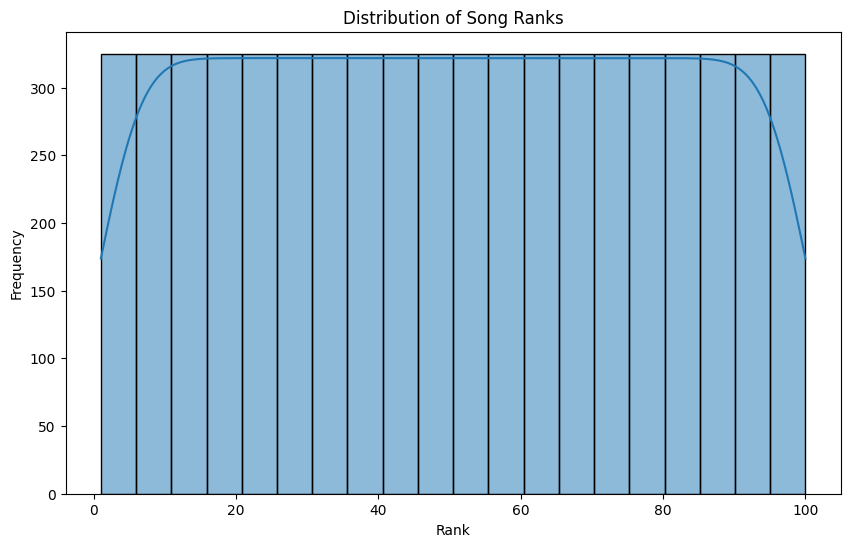

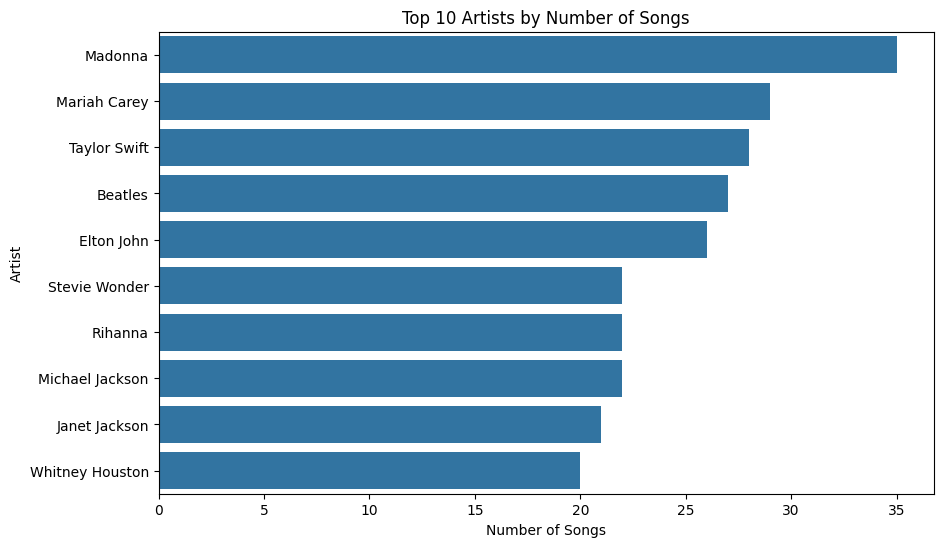

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Rank'], bins=20, kde=True)
plt.title('Distribution of Song Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

top_artists = data['Artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


In [8]:
# Converting 'Release Date' to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'])

data['Year'] = data['Release Date'].dt.year


In [9]:
rank_year_corr = data[['Year', 'Rank']].groupby('Year').mean().reset_index()
rank_year_corr['Rank'] = rank_year_corr['Rank'].round(2)

correlation = data['Year'].corr(data['Rank'])

top_artists = data['Artist'].value_counts().head(10).index
rank_distribution_top_artists = data[data['Artist'].isin(top_artists)].groupby('Artist')['Rank'].describe()

print("Average Rank by Year:")
print(rank_year_corr)
print("\nCorrelation between Year and Rank:")
print(correlation)
print("\nRank Distribution by Top 10 Artists:")
print(rank_distribution_top_artists)


Average Rank by Year:
      Year   Rank
0   1877.0  26.00
1   1922.0  70.00
2   1955.0  52.00
3   1957.0  77.00
4   1958.0  72.00
..     ...    ...
66  2020.0  52.36
67  2021.0  45.94
68  2022.0  48.67
69  2023.0  53.90
70  2024.0  82.00

[71 rows x 2 columns]

Correlation between Year and Rank:
0.04014067434061861

Rank Distribution by Top 10 Artists:
                 count       mean        std   min    25%   50%    75%    max
Artist                                                                       
Beatles           27.0  42.777778  31.624398   1.0  15.00  40.0  68.50   96.0
Elton John        26.0  47.038462  29.200659   1.0  21.75  45.5  72.50   95.0
Janet Jackson     21.0  38.619048  21.973794   4.0  19.00  38.0  49.00   84.0
Madonna           35.0  49.285714  28.678308   2.0  27.00  51.0  73.00   99.0
Mariah Carey      29.0  33.724138  24.335301   1.0  15.00  26.0  50.00   78.0
Michael Jackson   22.0  47.409091  30.316833   2.0  20.25  53.0  67.50   93.0
Rihanna           22.

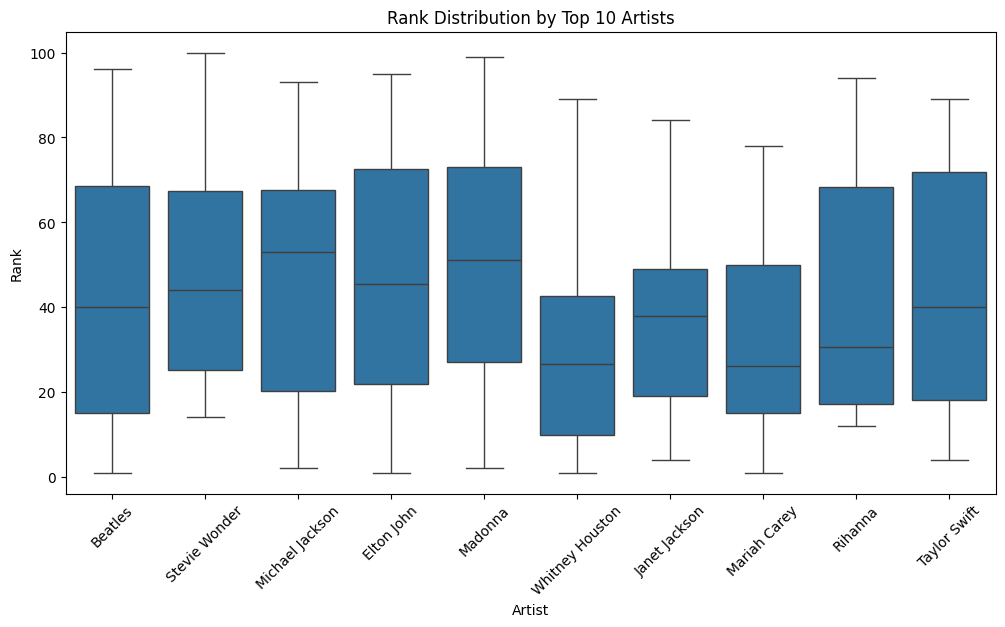

In [35]:
top_artists = data['Artist'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Rank', data=data[data['Artist'].isin(top_artists)])
plt.title('Rank Distribution by Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.show()


At this stage, I am moving on to exploring the categorical data and cleaning/preprocessing the text

In [36]:
# Checking for missing values
print(f"Missing Lyrics: {data['Lyrics'].isnull().sum()}")
empty_lyrics = data[data['Lyrics'].apply(lambda x: isinstance(x, str) and len(x) == 0)]
print(f"Empty Lyrics: {empty_lyrics.shape[0]}")
invalid_lyrics = data[data['Lyrics'].apply(lambda x: not isinstance(x, str))]
print(f"Invalid Lyrics (Non-string values): {invalid_lyrics.shape[0]}")


Missing Lyrics: 116
Empty Lyrics: 0
Invalid Lyrics (Non-string values): 116


In [37]:
# Removing missing values
data_cleaned = data.dropna(subset=['Lyrics'])

data_cleaned = data_cleaned[data_cleaned['Lyrics'].apply(lambda x: isinstance(x, str))]

print(f"Data after cleaning: {data_cleaned.shape[0]} rows")
print(data_cleaned['Lyrics'].isnull().sum())  # Check if there are any missing lyrics


Data after cleaning: 6384 rows
0


In [15]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Next, I am loading the necesssary tools to preprocess the lyrical data

In [39]:
import spacy
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Implementing custom stopwords
custom_stopwords = set(stopwords.words('english')).union({'chorus', 'verse', 'bridge', 'hook', 'intro', 'outro', 'nt'})
nlp = spacy.load("en_core_web_sm")
lemmatizer = WordNetLemmatizer()

#in the first round, i noticed contractions were not removed properly so I used a dictionary to ensure removal
def expand_contractions(text):
    contractions_dict = {
        "don't": "do not", "can't": "cannot", "won't": "will not", "didn't": "did not",
        "isn't": "is not", "aren't": "are not", "wasn't": "was not", "weren't": "were not",
        "hasn't": "has not", "haven't": "have not", "hadn't": "had not", "doesn't": "does not",
        "didn't": "did not", "couldn't": "could not", "shouldn't": "should not", "mightn't": "might not",
        "mustn't": "must not", "let's": "let us", "i'm": "i am", "you're": "you are", "he's": "he is",
        "she's": "she is", "it's": "it is", "we're": "we are", "they're": "they are", "that's": "that is",
        "what's": "what is", "who's": "who is", "where's": "where is", "how's": "how is"
    }
    for word, expansion in contractions_dict.items():
        text = re.sub(r'\b' + word + r'\b', expansion, text)
    return text

def preprocess_text(text):
    text = expand_contractions(text)

    # Converting to lowercase
    text = text.lower()

    # Removing non-alphanumeric characters (keeping spaces and words)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenizing the text using spaCy
    doc = nlp(text)

    words = [token.text for token in doc if token.text not in custom_stopwords and not token.is_punct]

    # Lemmatizing words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoining words
    cleaned_text = ' '.join(words)

    return cleaned_text
data_cleaned['cleaned_lyrics'] = data_cleaned['Lyrics'].apply(preprocess_text)

print(data_cleaned[['Song Title', 'Lyrics', 'cleaned_lyrics']].head())


                  Song Title  \
0  The Battle Of New Orleans   
1             Mack The Knife   
2                Personality   
3                      Venus   
4                 Lonely Boy   

                                              Lyrics  \
0  [Verse 1] In 1814 we took a little trip Along ...   
1  Oh the shark, babe Has such teeth, dear And he...   
2  Over and over I tried to prove my love to you ...   
3  Hey, Venus! Oh, Venus!  Venus, if you will Ple...   
4  I'm just a lonely boy Lonely and blue I'm all ...   

                                      cleaned_lyrics  
0      took little trip along colonel jackson mig...  
1  oh shark babe teeth dear show pearly white jac...  
2  tried prove love   friend say fool ill fool   ...  
3  hey venus oh venus   venus please send little ...  
4  lonely boy lonely blue alone nothin   got ever...  


Now that the data is preprocessed, we move on to vectorizing the text data to fit the LDA model



Topic 1:
said like man day time old know hand make say
Topic 2:
say tell mr know mam like boy come dad want
Topic 3:
love time night heart day away ill know life let
Topic 4:
like nigga got la bitch shit know love ai fuck
Topic 5:
baby yeah love oh know got like na want girl
                  Song Title  dominant_topic                       topic_label
0  The Battle Of New Orleans               0  Reflections and Life Experiences
1             Mack The Knife               4     Romantic Desire and Affection
2                Personality               3   Street Culture and Raw Emotions
3                      Venus               0  Reflections and Life Experiences
4                 Lonely Boy               2        Love and Emotional Longing


<ipython-input-40-152ba0ce7419>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic_label', data=data_cleaned, palette='viridis')


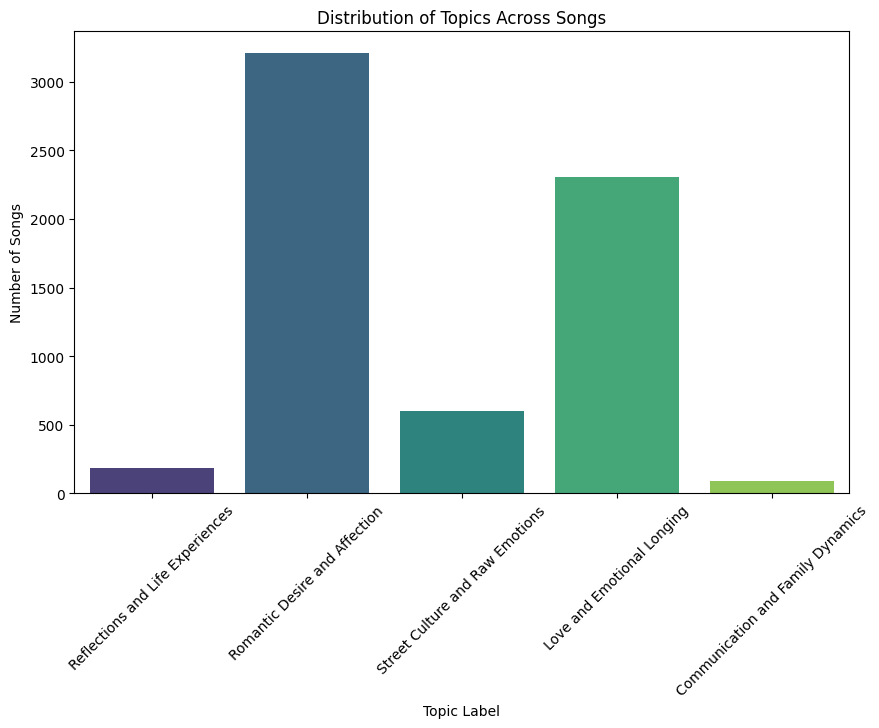

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

texts = data_cleaned['cleaned_lyrics'].dropna()

vectorizer = CountVectorizer(stop_words='english', max_features=5000)

X = vectorizer.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Retreving the words for with each topic
words = vectorizer.get_feature_names_out()

#display/interpret top words/topic
def print_top_words(model, feature_names, n_top_words=10):
    topic_labels = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]


        print(f"Topic {topic_idx + 1}:")
        print(" ".join(top_words))

        #Labels/catergory interpretations were created by human coder after first iteration retrieved top words
        if topic_idx == 0:
            topic_labels[topic_idx] = "Reflections and Life Experiences"
        elif topic_idx == 1:
            topic_labels[topic_idx] = "Communication and Family Dynamics"
        elif topic_idx == 2:
            topic_labels[topic_idx] = "Love and Emotional Longing"
        elif topic_idx == 3:
            topic_labels[topic_idx] = "Street Culture and Raw Emotions"
        elif topic_idx == 4:
            topic_labels[topic_idx] = "Romantic Desire and Affection"

    return topic_labels

topic_labels = print_top_words(lda, words)

# Adding the dominant topic for each song
topic_probabilities = lda.transform(X)
dominant_topic = topic_probabilities.argmax(axis=1)
data_cleaned['dominant_topic'] = dominant_topic

# Mapping topic labels to the songs
data_cleaned['topic_label'] = data_cleaned['dominant_topic'].map(topic_labels)

print(data_cleaned[['Song Title', 'dominant_topic', 'topic_label']].head())

# Visualizing topic distribution across songs
plt.figure(figsize=(10, 6))
sns.countplot(x='topic_label', data=data_cleaned, palette='viridis')
plt.title('Distribution of Topics Across Songs')
plt.xlabel('Topic Label')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


Testing the coherence score to confirm quality of topics

In [41]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

texts = [text.split() for text in data_cleaned['cleaned_lyrics']]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

from gensim.models import LdaModel
lda_gensim = LdaModel(corpus, num_topics=5, id2word=dictionary)

coherence_model_lda = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.5125489353605521


0.51 coherence score represents moderate coherence

Comparing ML models for classifying the dominant topic of song lyrics

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data_cleaned['cleaned_lyrics'].dropna())
y = data_cleaned['dominant_topic']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
logreg_predictions = logreg.predict(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
print(classification_report(y_test, logreg_predictions))
print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))

print("\nSVM Performance:")
print(classification_report(y_test, svm_predictions))
print("Accuracy:", accuracy_score(y_test, svm_predictions))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.41      0.51        37
           1       0.45      0.26      0.33        19
           2       0.83      0.89      0.86       460
           3       0.90      0.70      0.79       125
           4       0.89      0.91      0.90       636

    accuracy                           0.86      1277
   macro avg       0.75      0.64      0.68      1277
weighted avg       0.86      0.86      0.86      1277

Accuracy: 0.860610806577917

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.46      0.16      0.24        37
           1       0.67      0.11      0.18        19
           2       0.80      0.71      0.75       460
           3       0.94      0.36      0.52       125
           4       0.74      0.94      0.83       636

    accuracy                           0.76      1277
   macro avg       0.72      0.45      0.5

In [ ]:
#I have selected Logistic Regression to continue topic predictions in my analysis

In [43]:
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data_cleaned['cleaned_lyrics'].dropna())
y = data_cleaned['dominant_topic']

# Retraining Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X, y)

# Get predictions
data_cleaned['predicted_topic'] = logreg.predict(X)

# Map the predicted topic to a label
topic_labels = {
    0: "Reflections and Life Experiences",
    1: "Communication and Family Dynamics",
    2: "Love and Emotional Longing",
    3: "Street Culture and Raw Emotions",
    4: "Romantic Desire and Affection"
}
data_cleaned['predicted_topic_label'] = data_cleaned['predicted_topic'].map(topic_labels)


Using the logistic regression model, continue visualizations

In [44]:
#grouping by decade
data_cleaned['Decade'] = (data_cleaned['Year'] // 10) * 10
decade_topic_distribution = data_cleaned.groupby(['Decade', 'predicted_topic']).size().unstack(fill_value=0)
decade_topic_distribution_normalized = decade_topic_distribution.div(decade_topic_distribution.sum(axis=1), axis=0)


<Figure size 1200x800 with 0 Axes>

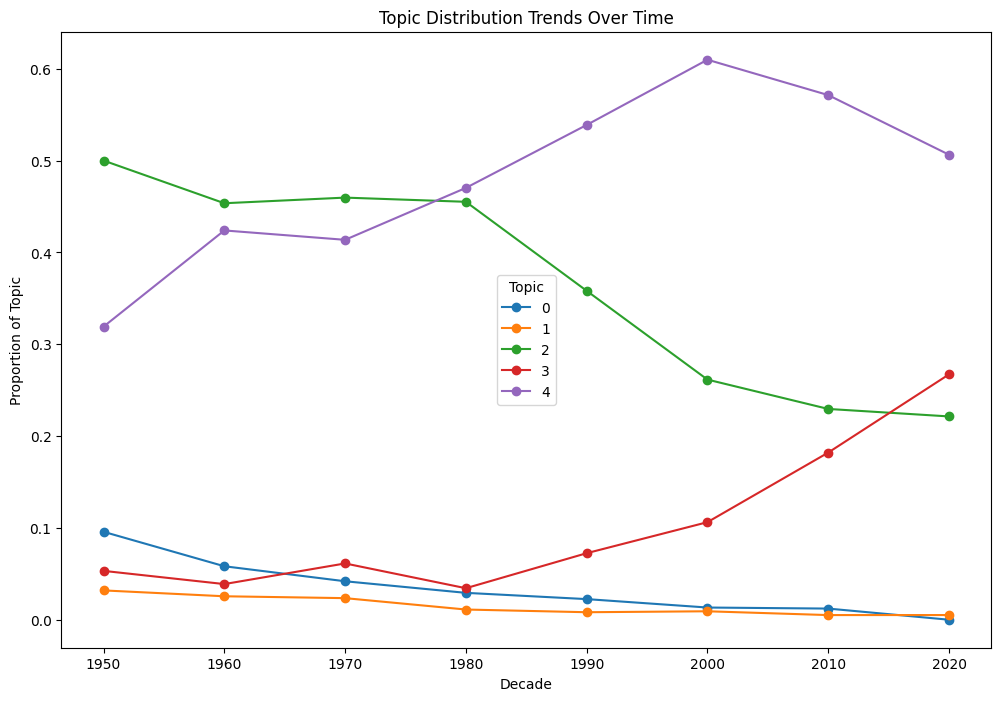

In [46]:
# Ploting topic distribution trends over time
plt.figure(figsize=(12, 8))
decade_topic_distribution_normalized.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Topic Distribution Trends Over Time')
plt.xlabel('Decade')
plt.ylabel('Proportion of Topic')
plt.legend(title='Topic')
plt.show()


<Figure size 1200x800 with 0 Axes>

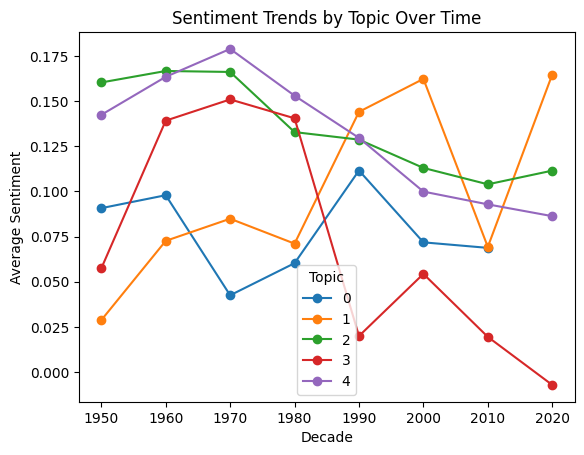

In [48]:
from textblob import TextBlob

#sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

data_cleaned['sentiment'] = data_cleaned['cleaned_lyrics'].apply(calculate_sentiment)

topic_sentiment_by_decade = data_cleaned.groupby(['Decade', 'dominant_topic'])['sentiment'].mean().unstack()

# Visualizing sentiment trends by decade
plt.figure(figsize=(12, 8))
topic_sentiment_by_decade.plot(kind='line', marker='o')
plt.title('Sentiment Trends by Topic Over Time')
plt.xlabel('Decade')
plt.ylabel('Average Sentiment')
plt.legend(title='Topic')
plt.show()


In [56]:
# Sentitment summary stats
sentiment_stats = data_cleaned['sentiment'].describe()
print("Sentiment Summary Statistics:")
print(sentiment_stats)


Sentiment Summary Statistics:
count    6384.000000
mean        0.123441
std         0.192460
min        -0.831108
25%         0.000000
50%         0.119649
75%         0.250969
max         1.000000
Name: sentiment, dtype: float64


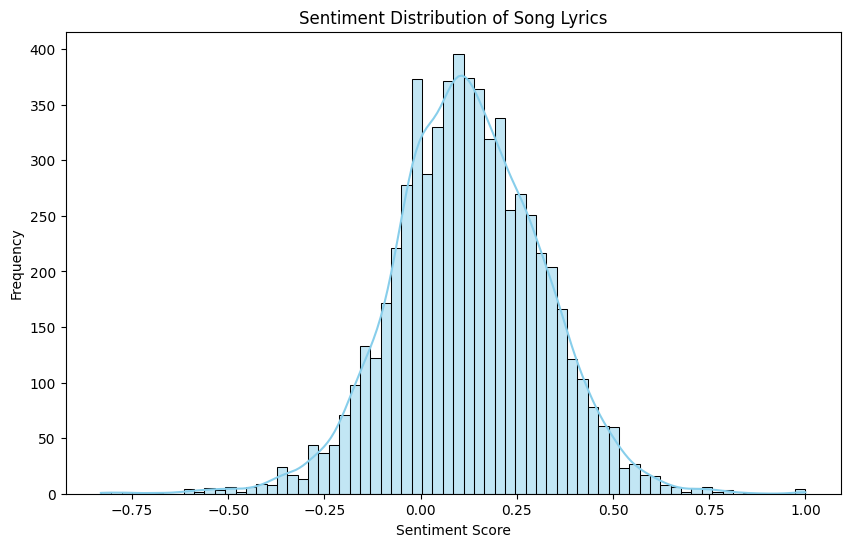

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sentiment
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['sentiment'], kde=True, color='skyblue')
plt.title('Sentiment Distribution of Song Lyrics')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


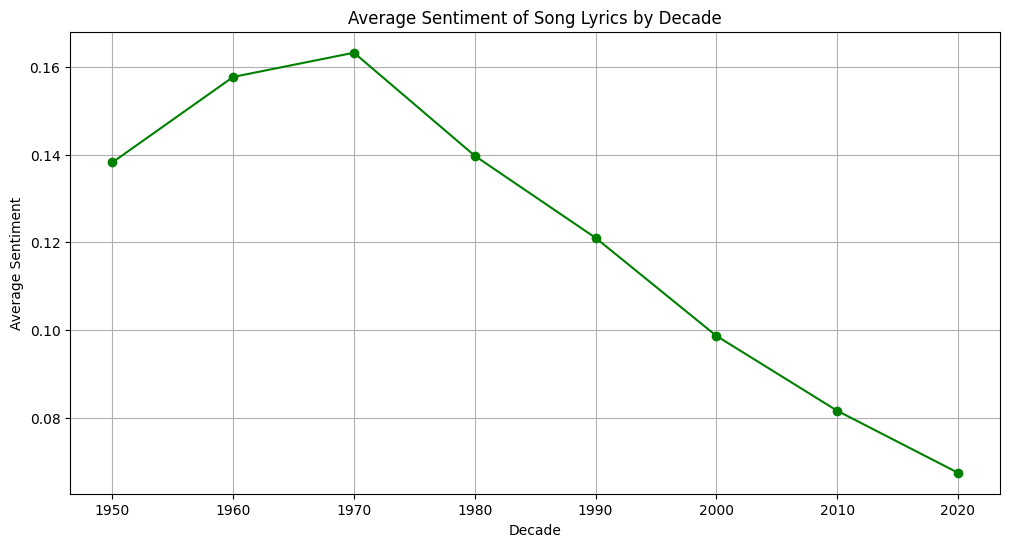

In [58]:
decade_sentiment = data_cleaned.groupby('Decade')['sentiment'].mean()

# Plot sentiment over decades
plt.figure(figsize=(12, 6))
decade_sentiment.plot(kind='line', marker='o', color='green')
plt.title('Average Sentiment of Song Lyrics by Decade')
plt.xlabel('Decade')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()


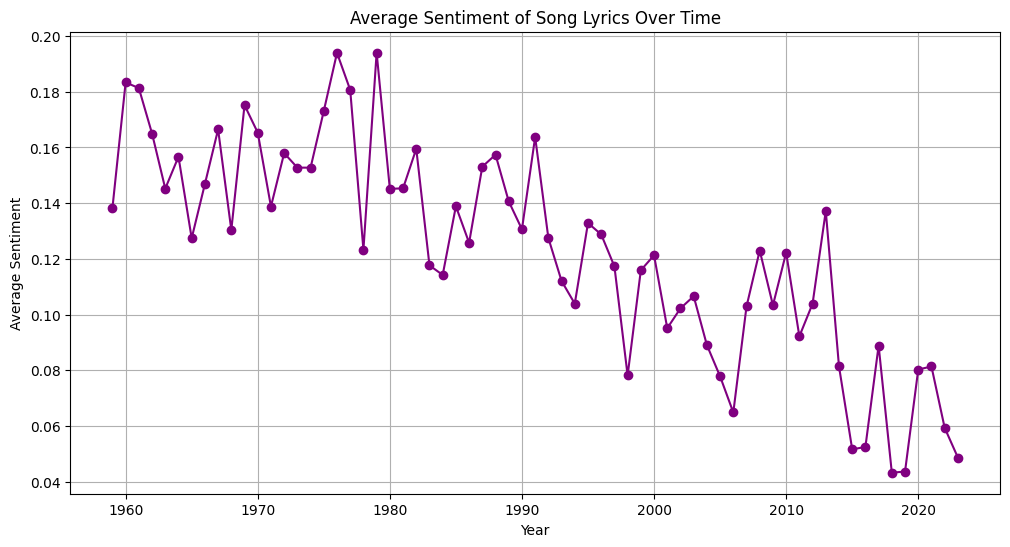

In [59]:
#Visualizing by year to get a more precise image of trends
# Group by Year and calculate the average sentiment
yearly_sentiment = data_cleaned.groupby('Year')['sentiment'].mean().reset_index()

# Plot the sentiment over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment['Year'], yearly_sentiment['sentiment'], color='purple', marker='o')
plt.title('Average Sentiment of Song Lyrics Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.grid(True)
plt.show()
